Gradient Descent Implementation


In this Python notebook we will go through an example of implementing Gradient Descent in simple and multiple linear regression, for this we will be using housing dataset.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Text(0.5, 1.0, 'Data')

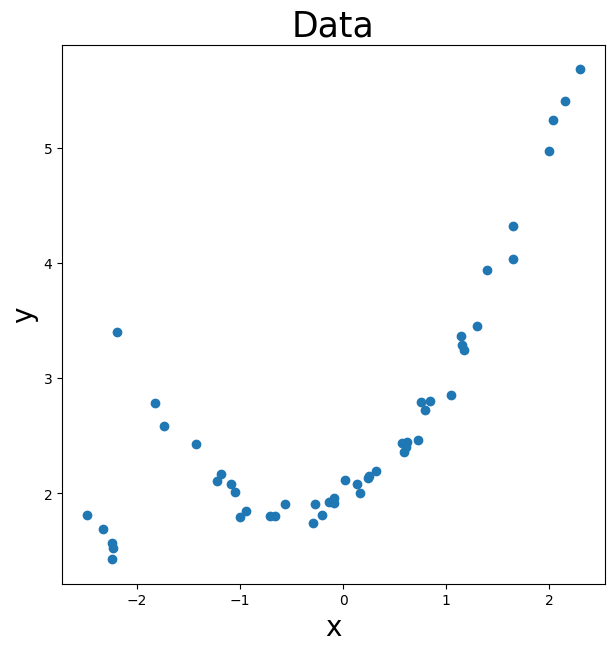

In [42]:
numvals = 50
true_w = 0.5

xvals = np.sort(5*(np.random.random(numvals) - 0.5))
yvals = true_w*(xvals + xvals**2) + np.random.normal(0, 0.1, numvals)
yvals[int(numvals*0.1):] += 2

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Data', fontsize=25)

In [43]:
def get_loss(w, xvals, yvals):
    return np.sum((w*xvals + w*xvals**2 - yvals)**2)

In [44]:
def get_gradient(w, xvals, yvals):
    grad = np.sum(2*(xvals + xvals**2)*(w*xvals + w*xvals**2 - yvals))
    return grad



Text(0.5, 1.0, 'Loss Function')

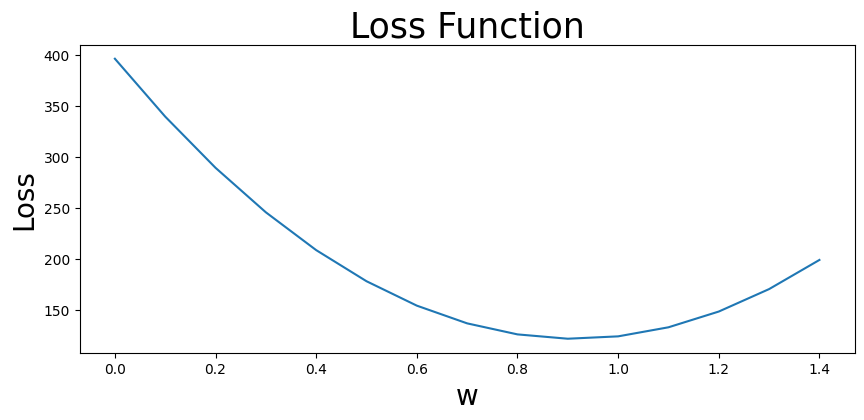

In [45]:
wvals = np.arange(0,1.5,0.1)
lossvals = [get_loss(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, lossvals)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Loss Function', fontsize=25)

Text(0.5, 1.0, 'Gradient')

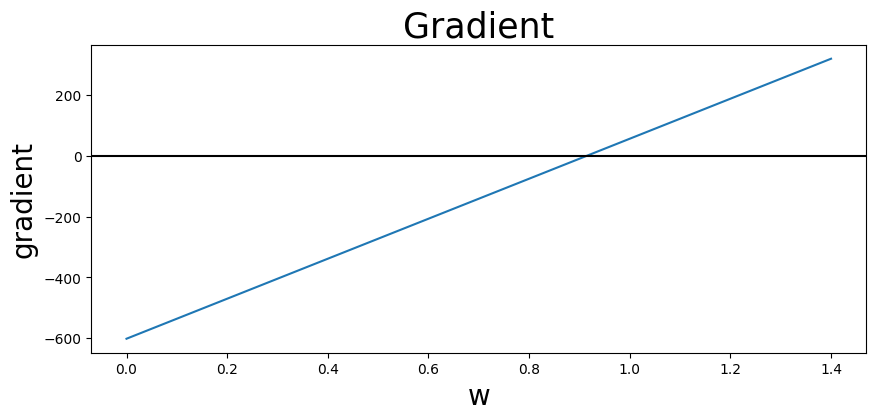

In [48]:
wvals = np.arange(0,1.5,0.1)
gradvals = [get_gradient(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, gradvals)
plt.axhline(0, color='k')
plt.xlabel('w', fontsize=20)
plt.ylabel('gradient', fontsize=20)
plt.title('Gradient', fontsize=25)

In [49]:
def perform_gradient_descent(init_w, eta, num_iters, get_gradient):
    #initial value of w
    w_vals = [init_w]

    #for a fixed number of iterations
    for _ in range(num_iters):
        #get get gradient
        grad = get_gradient(w_vals[-1], xvals, yvals)

        #travel in the direction of the gradient
        w_vals.append(w_vals[-1] - eta*grad)
    return w_vals

In [50]:
def perform_gradient_descent(init_w, eta, num_iters, get_gradient):
    #initial value of w
    w_vals = [init_w]

    #for a fixed number of iterations
    for _ in range(num_iters):
        #get get gradient
        grad = get_gradient(w_vals[-1], xvals, yvals)

        #travel in the direction of the gradient
        w_vals.append(w_vals[-1] - eta*grad)
    return w_vals

Text(0.5, 1.0, 'Gradient Descent Progress\nFinal w: 0.88')

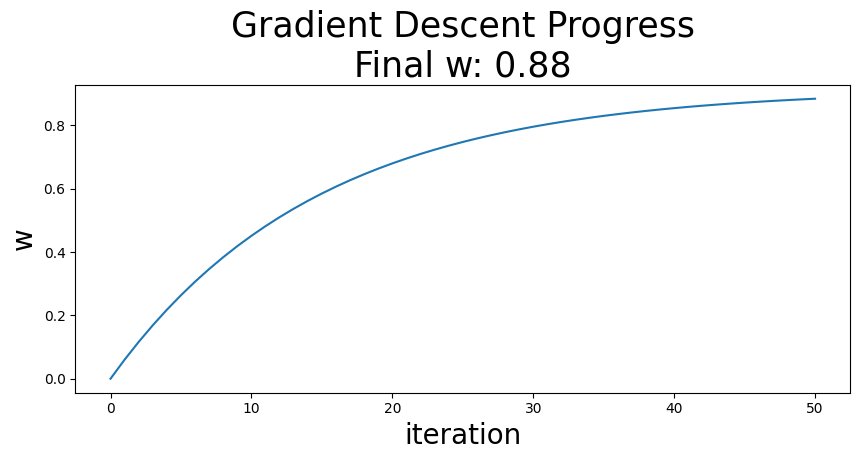

In [51]:
w_vals = perform_gradient_descent(0, 0.0001, 50, get_gradient)

plt.figure(figsize=(10,4))
plt.plot(w_vals)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('w', fontsize=20)
plt.title('Gradient Descent Progress\nFinal w: %s'%round(w_vals[-1],2), fontsize=25)

Text(0.5, 1.0, 'Fitted Model')

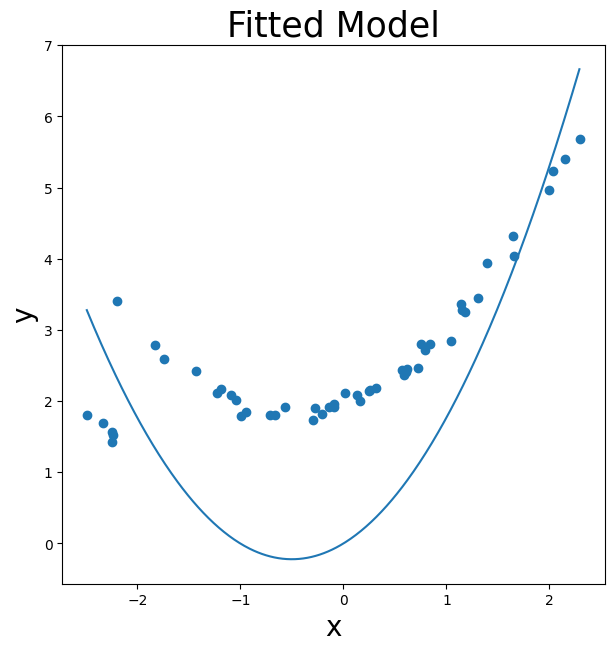

In [52]:
xrange = np.arange(xvals.min(), xvals.max(), 0.01)
pred_yvals_loss1 = w_vals[-1]*(xrange + xrange**2)

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss1)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Fitted Model', fontsize=25)